## Hands On Machine Learning Chapter 2
#### End-to-End Prediction Machine Learning Project

##### 1. Look at the Big Picture

In [1]:
# Objective: Build an ML model that accurately predicts the estimated value of California houses given Census data. 

##### 2. Get the Data

In [2]:
# Importing the Proper Libraries
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Original Library Imports Deprecated
#from pathlib import Path
#import pandas as pd
#import tarfile
#import urllib.request

In [4]:
# Replacing code from book with Ageron Github code due to a couple misalignments between book and completed 
# Source = https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

#def load_housing_data():
#    tarball_path=Path("datasets/housing.tgz")
#    if not tarball_path.is_file():
#       Path("datasets").mkdir(parents=True,exist_ok=True)
#       url= "https://github.com/ageron/data/raw/main/housing.tgz"
#       urllib.request.urlretrieve(url, tarball_path)
#       with tarfile.open(tarball_path) as housing_tarball:
#           housing_tarball.extractall(path="datasets")
#    return pd.read_csv(Path("datasets/housing/housing.csv"))

#housing=load_housing_data()

In [5]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [7]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
housing.shape

(20640, 10)

In [12]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

##### 3. Explore and Visalize the Data to Gain Insights 

Saving figure attribute_histogram_plots


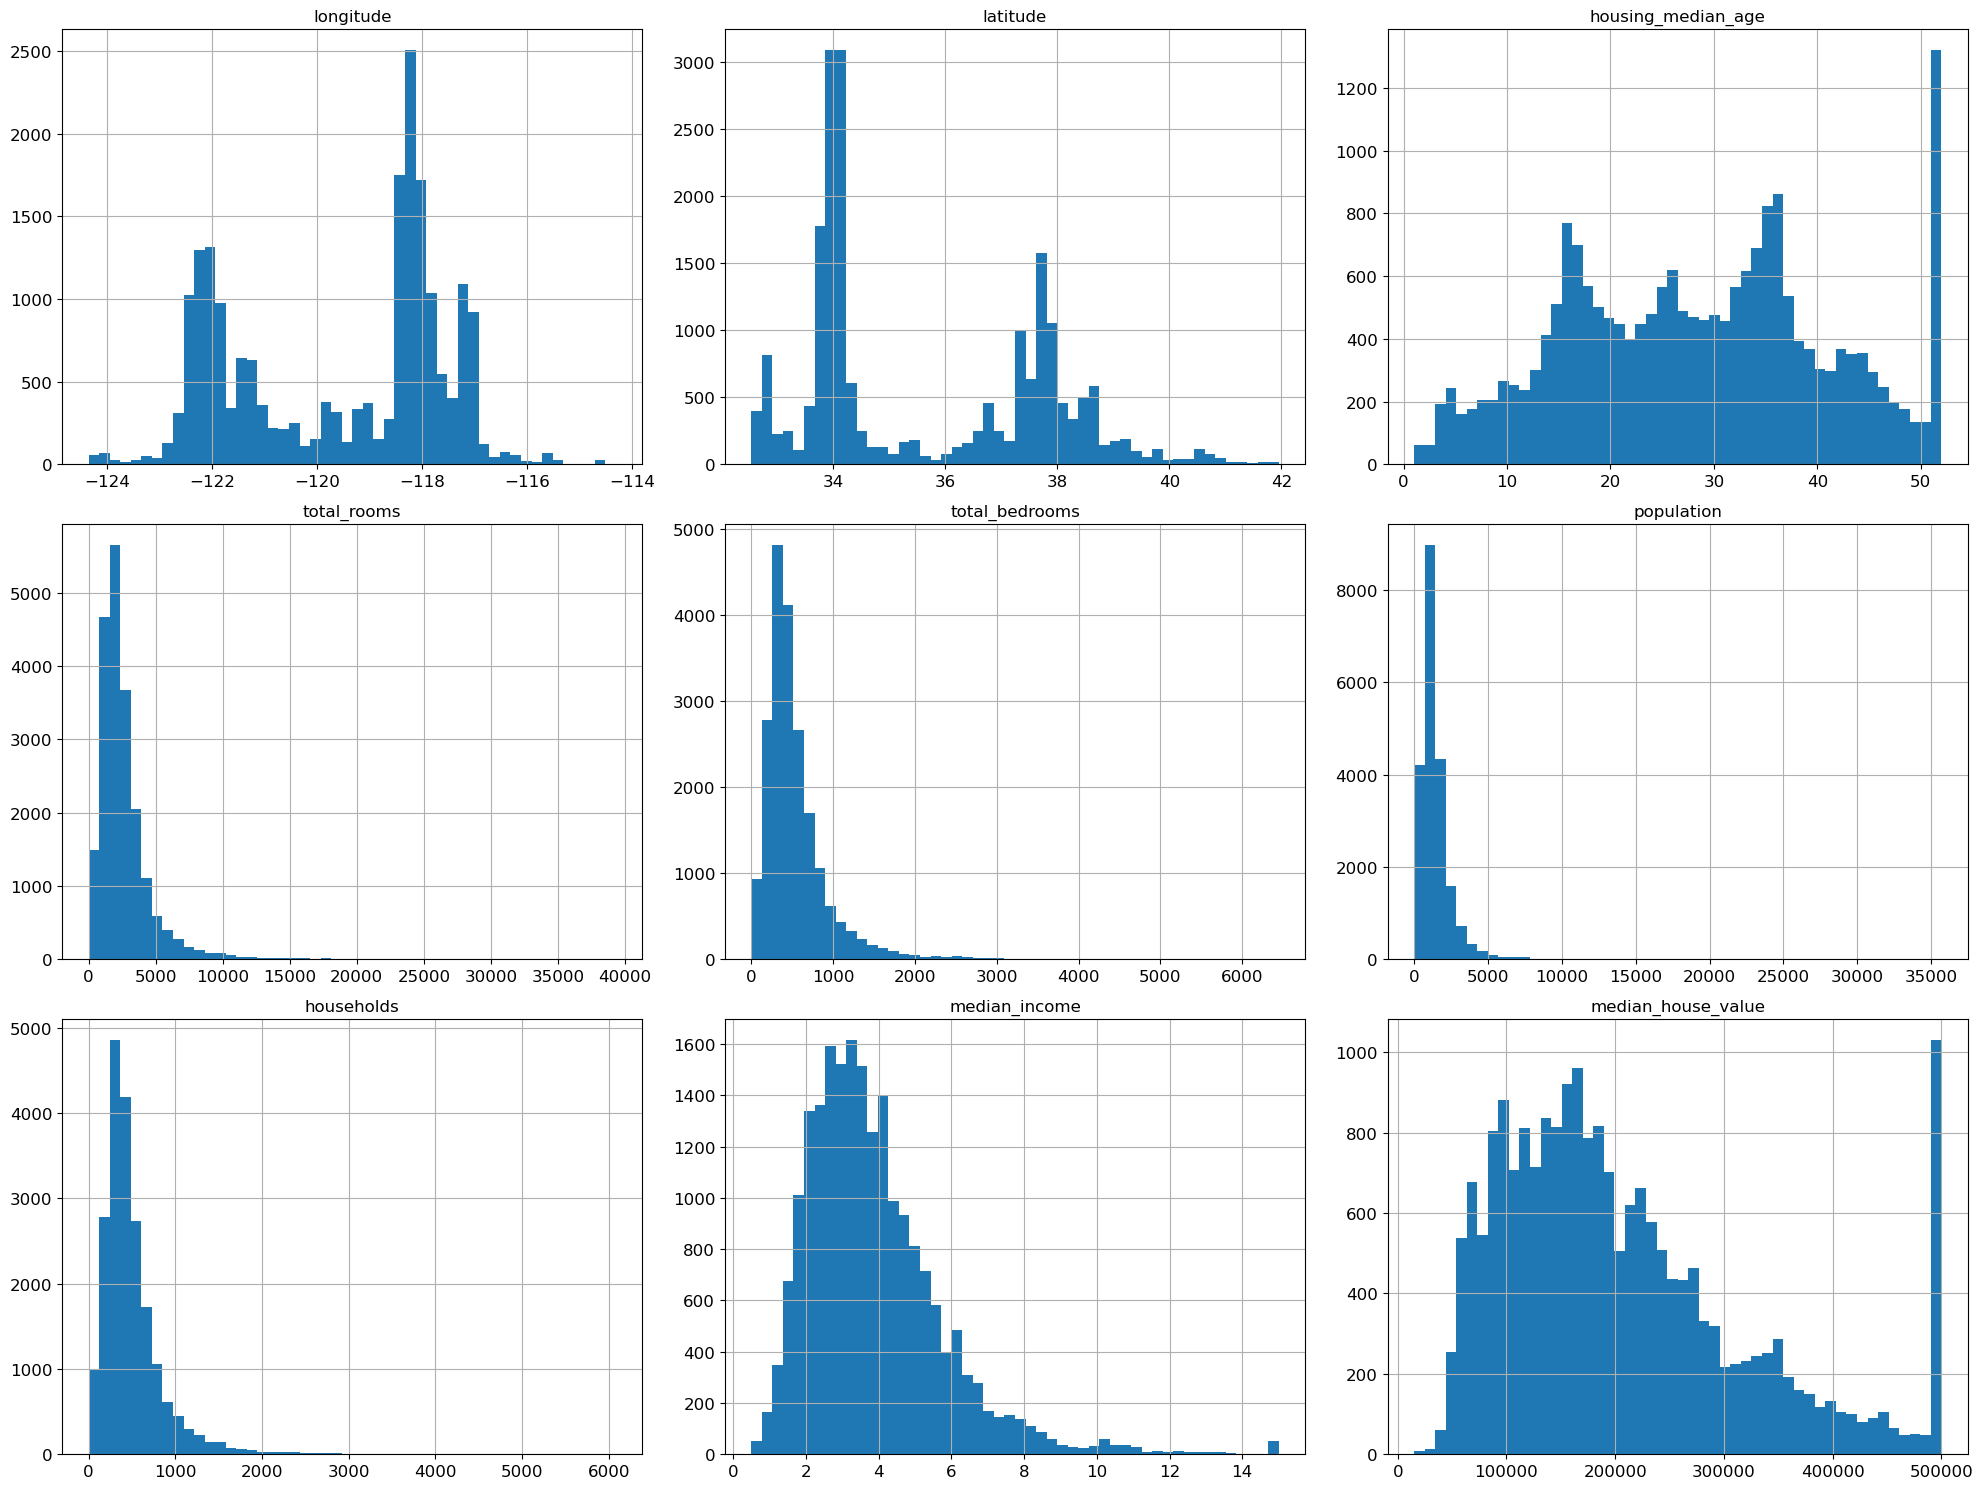

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [17]:
import numpy as np

In [18]:
np.random.seed(42)

In [19]:
def shuffle_and_split_data(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
#train_set, test_set = shuffle_and_split_data(housing, 0.2)
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [21]:
len(test_set)

4128

In [22]:
from zlib import crc32

In [23]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [24]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [25]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [26]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


<AxesSubplot:>

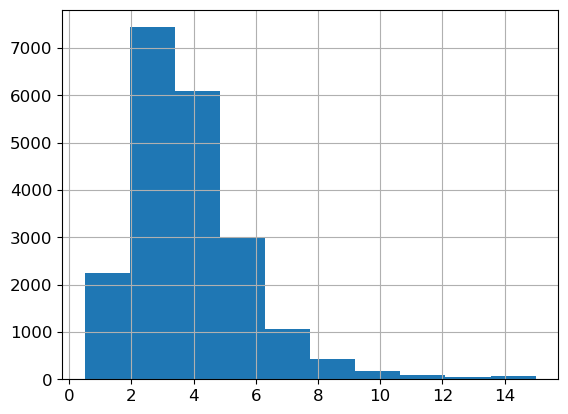

In [27]:
housing["median_income"].hist()

In [28]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0.,1.5,3.0,4.5,6., np.inf],
                              labels=[1,2,3,4,5])

In [29]:
housing["income_cat"].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

In [30]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<AxesSubplot:>

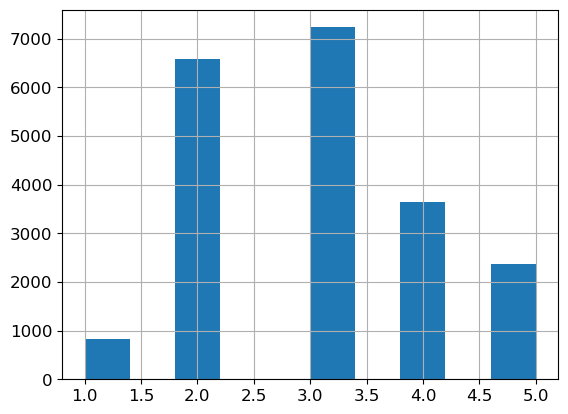

In [31]:
housing["income_cat"].hist()

In [32]:
# Adds an 'index' column
#housing_with_id = housing.reset_index() 

In [33]:
#train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [34]:
#housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [35]:
#train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [36]:
#Import StratifiedShuffleSplit Method from SciKitLearn Library
from sklearn.model_selection import StratifiedShuffleSplit

In [37]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [38]:
# Import SK Learn Train-Test-Split Method
from sklearn.model_selection import train_test_split

In [39]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [40]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [41]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [42]:
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [43]:
#housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
#plt.xlabel("Income Category")
#plt.ylabel("Number of Districts")
#plt.show()

In [44]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [45]:
#splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
#strat_splits = []

#for train_index, test_index in  splitter.split(housing, housing ["income_cat"]):
#   strat_train_set_n = housing.iloc[train_index]
#   strat_test_set_n = housing.iloc[test_index]
#   strat_splits.append([strat_train_set_n, strat_test_set_n])

In [46]:
#strat_train_set, strat_test_set = strat_splits[0]

In [47]:
#strat_train_set, strat_test_set = train_test_split(
#    housing, test_size=0.2,stratify=housing["income_cat"], random_state=42)

In [48]:
#strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [49]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [50]:
housing.shape

(20640, 11)

In [51]:
#Creating a Backup of the Housing DataFrame
#housing2=housing

In [52]:
housing=strat_train_set.copy()

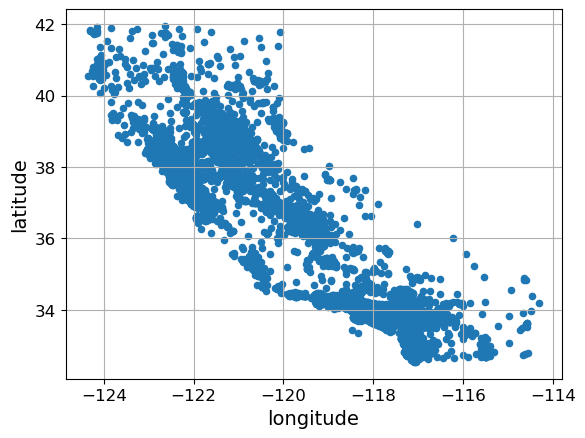

In [53]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

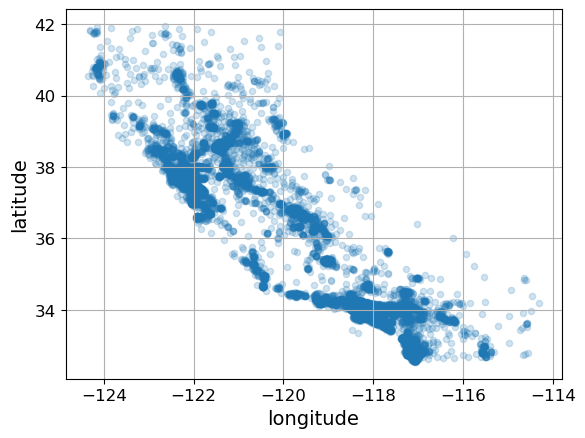

In [54]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

In [55]:
#housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
#            s=housing["population"]/100, label="population",
#            c="median_house_value" , cmap ="jet", colorbar=True,
#            legend=True, sharex=False, figsize=(10,7))
#plt.show()

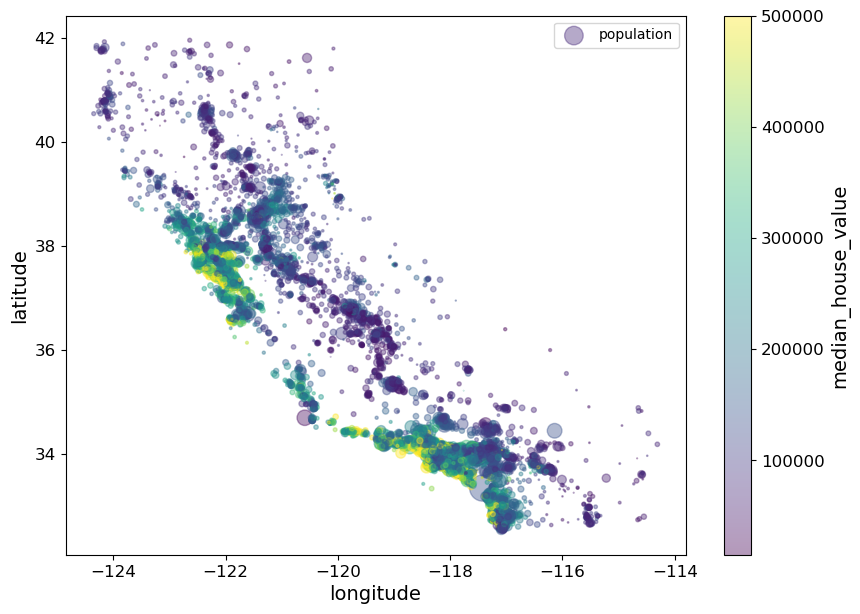

In [56]:
# Issue with plot.cmap() get_cmap() method
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"] / 100, label="population", figsize=(10,7),
             c="median_house_value", colorbar=True)
plt.legend()

In [57]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1b12eaac1f0>)

Saving figure california_housing_prices_plot


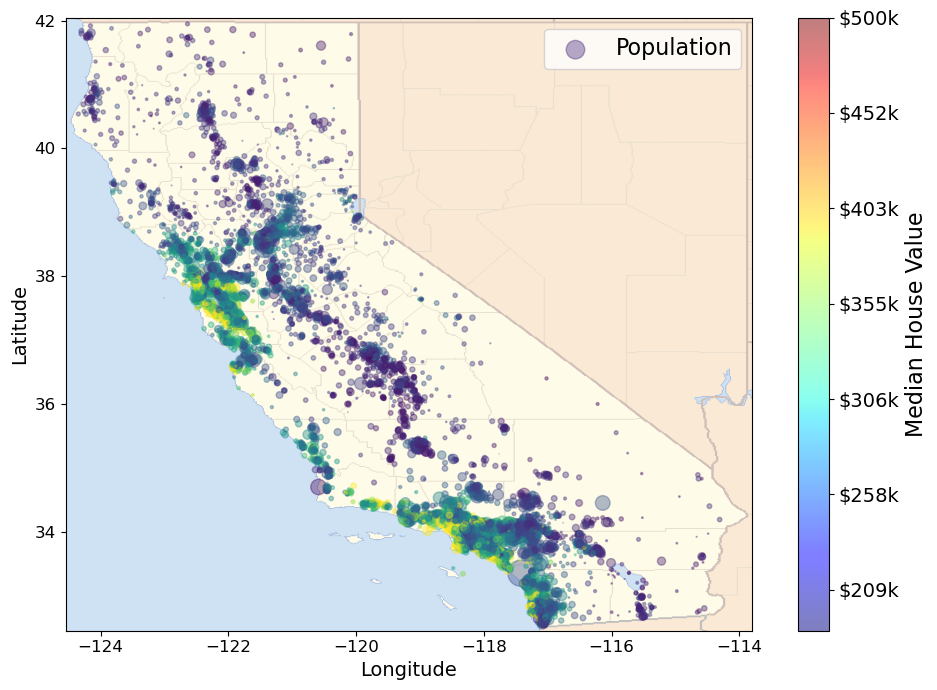

In [58]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [59]:
# Noice!

##### Correlation Analysis

In [60]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [61]:
# Dropping the String Column 'ocean_proximity' before Creating a Correlation Matrix
corr_matrix = housing.drop(columns=['ocean_proximity']).corr()

In [62]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [63]:
# Import Scatter Matrix from Pandas.Plotting Library
from pandas.plotting import scatter_matrix

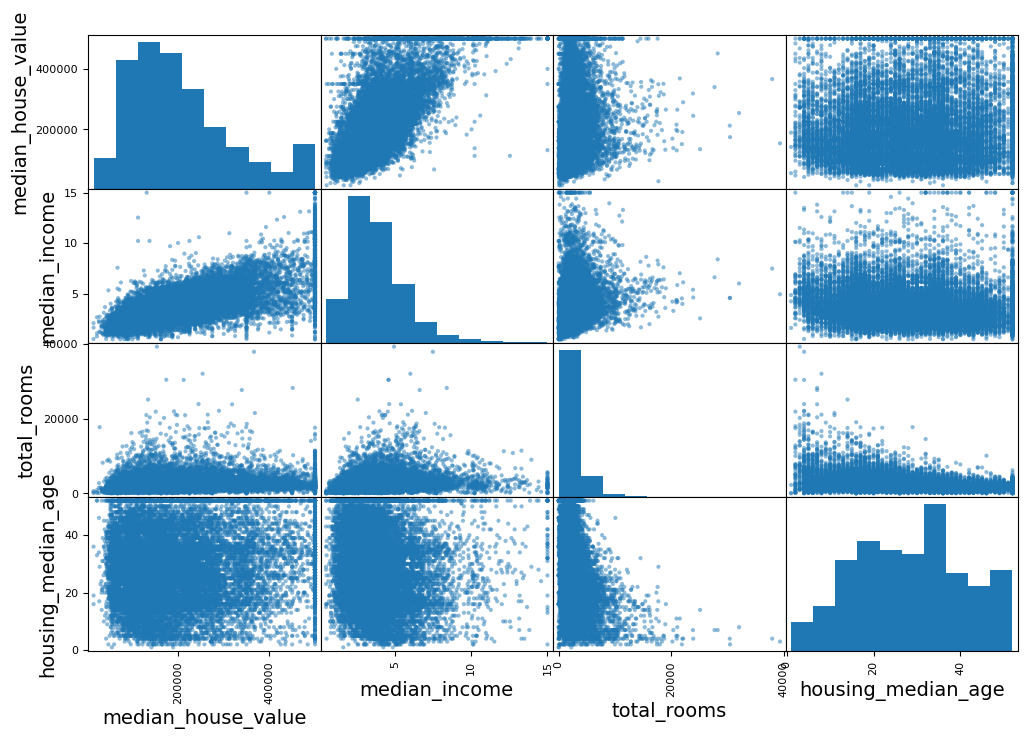

In [64]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

In [65]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [66]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

In [67]:
housing['bedrooms_ratio']=housing['total_bedrooms'] / housing['total_rooms']

In [68]:
housing['people_per_house']=housing['population'] / housing['households']

In [69]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_house',
       'bedrooms_ratio', 'people_per_house'],
      dtype='object')

In [70]:
housing.shape

(16512, 13)

In [71]:
corr_matrix = housing.drop(columns=['ocean_proximity']).corr()

In [72]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [73]:
housing['rooms_per_house']

12655    5.485836
15502    6.927083
2908     5.393333
14053    3.886128
20496    6.096552
           ...   
15174    6.658342
12661    5.571932
19263    4.110465
19140    6.297405
19773    5.477157
Name: rooms_per_house, Length: 16512, dtype: float64

In [74]:
housing[['rooms_per_house','bedrooms_ratio','people_per_house']]

,rooms_per_house,bedrooms_ratio,people_per_house
12655,5.485836,0.205784,3.168555
15502,6.927083,0.160714,2.623698
2908,5.393333,0.191595,2.223333
14053,3.886128,0.276505,1.859213
20496,6.096552,0.182692,3.167241
...,...,...,...
15174,6.658342,0.184696,2.023976
12661,5.571932,0.179977,3.363188
19263,4.110465,0.234795,2.662791
19140,6.297405,0.183835,2.411178


In [75]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


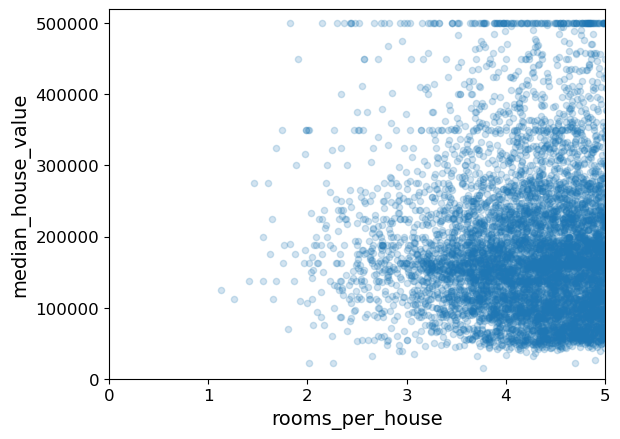

In [76]:
housing.plot(kind="scatter", x="rooms_per_house", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

##### 4. Prepare the Data for Machine Learning Algorithms

In [77]:
housing=strat_train_set.drop("median_house_value", axis=1)

In [78]:
housing_labels= strat_train_set["median_house_value"].copy()

In [79]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [80]:
housing.shape

(16512, 9)

In [81]:
housing.total_bedrooms.value_counts()

total_bedrooms
272.0     44
280.0     44
393.0     43
345.0     41
328.0     41
          ..
1705.0     1
3984.0     1
1386.0     1
2704.0     1
1661.0     1
Name: count, Length: 1810, dtype: int64

In [82]:
housing.total_bedrooms.isna().sum()

158

In [83]:
# Option 1
housing_option1=housing.dropna(subset=["total_bedrooms"]) 

In [84]:
# Option 2
housing_option2=housing.drop("total_bedrooms", axis=1)

In [85]:
# Option 3
median=housing["total_bedrooms"].median()

In [86]:
median

433.0

In [87]:
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_18504\1782877594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [88]:
housing.total_bedrooms.value_counts()

total_bedrooms
433.0     181
272.0      44
280.0      44
393.0      43
331.0      41
         ... 
1705.0      1
3984.0      1
1386.0      1
2704.0      1
1661.0      1
Name: count, Length: 1810, dtype: int64

In [89]:
print(housing_option1.shape)
print(housing_option2.shape)
print(housing.shape) #Option 3

(16354, 9)
(16512, 8)
(16512, 9)


In [90]:
# All NA values changed to Median in housing data frame
housing.total_bedrooms.isna().sum()

0

In [91]:
from sklearn.impute import SimpleImputer

In [92]:
imputer = SimpleImputer(strategy="median")

In [93]:
housing_num = housing.select_dtypes(include=[np.number])

In [94]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [95]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [96]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [97]:
X = imputer.transform(housing_num)

In [98]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [99]:
housing_cat = housing[["ocean_proximity"]]

In [100]:
housing_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


In [101]:
from sklearn.preprocessing import OrdinalEncoder

In [102]:
oridinal_encoder = OrdinalEncoder()

In [103]:
housing_cat_encoded = oridinal_encoder.fit_transform(housing_cat)

In [104]:
housing_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [105]:
oridinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [106]:
from sklearn.preprocessing import OneHotEncoder

In [107]:
cat_encoder = OneHotEncoder()

In [108]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [109]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [110]:
housing.shape

(16512, 9)

In [111]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [112]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [113]:
df_test=pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})

In [114]:
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [115]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [116]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN","ISLAND"]})

In [117]:
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [118]:
cat_encoder.handle_unknown = "ignore"

In [119]:
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [120]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [121]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [122]:
df_test_unknown

,ocean_proximity
0,<2H OCEAN
1,ISLAND


In [123]:
#df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
#                        columns=cat_encoder.get_feature_names_out(),
#                        index=df_test_unknown.index)

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
min_max_scalar = MinMaxScaler(feature_range=(-1,1))

In [126]:
housing_num_min_max_scaled = min_max_scalar.fit_transform(housing_num)

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
std_scaler = StandardScaler()

In [129]:
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [130]:
from sklearn.metrics.pairwise import rbf_kernel

In [131]:
age_simil_35 = rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
target_scaler = StandardScaler()

In [134]:
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

In [135]:
model = LinearRegression()

In [136]:
model.fit(housing[["median_income"]], scaled_labels)

LinearRegression()

In [137]:
some_new_data=housing[["median_income"]].iloc[:5] # Pretending this new data =)

In [138]:
scaled_predictions=model.predict(some_new_data)

In [139]:
predictions = target_scaler.inverse_transform(scaled_predictions)

In [140]:
scaled_predictions

array([[-0.61407017],
       [ 0.88791396],
       [-0.36105202],
       [-0.59502347],
       [ 0.22384052]])

In [141]:
predictions

array([[135958.75805364],
       [309735.008975  ],
       [165232.3998617 ],
       [138162.41971241],
       [232903.1766333 ]])

In [142]:
from sklearn.compose import TransformedTargetRegressor

In [143]:
model = TransformedTargetRegressor(LinearRegression(),
                                  transformer=StandardScaler())

In [144]:
model.fit(housing[["median_income"]], housing_labels)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [145]:
predictions = model.predict(some_new_data)

In [146]:
predictions

array([135958.75805364, 309735.008975  , 165232.3998617 , 138162.41971241,
       232903.1766333 ])

In [147]:
from sklearn.preprocessing import FunctionTransformer

In [148]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

In [149]:
log_pop = log_transformer.transform(housing[["population"]])

In [150]:
log_transformer

FunctionTransformer(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>)

In [151]:
log_pop

,population
12655,7.712891
15502,7.608374
2908,6.502790
14053,6.800170
20496,7.515889
...,...
15174,7.613819
12661,8.469892
19263,6.126869
19140,7.096721


In [152]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[[35.]], gamma=0.1))

In [153]:
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [154]:
sf_coords = 37.7749, -122.41

In [155]:
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))

In [156]:
sf_simil=sf_transformer.transform(housing[["latitude","longitude"]])

In [157]:
ratio_transformer = FunctionTransformer(lambda X: X[:,[0]] / X[:,[1]] )

In [158]:
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

In [159]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [160]:
# Create Standard Scaler Clone Object
class StandardScalerClone(BaseEstimator, TransformerMixin):
    # Init Dunder Method
    def __init__(self, with_mean=True): # no * args or **kwargs
        self.with_mean = with_mean
    
    # Fit Function
    def fit(self, X, y=None): # y is required even though we don't use it
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_= X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[1] # every estimator stores this in fit()
        return self # always return self!
    
    # Transform Function
    def transform(self, X):
        check_is_fitted(self) # looks for learned attributes (with training _)
        X = check_array(X)
        assert self.n_features_in_==X.shape[1]
        if self.with_mean:
            X = X- self.mean_
        return X / self.scale_
    
        # Get Feature Names Out Function
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [161]:
from sklearn.cluster import KMeans

In [162]:
#Create Custom Estimator Object

class ClusterSimiliarity(BaseEstimator, TransformerMixin):
    # Init Dunder Method
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    # Fit Function
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!
        
    # Transform Function
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    # Get Feature Names Out Function
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [163]:
cluster_simil=ClusterSimiliarity(n_clusters=10, gamma=1., random_state=42)

In [164]:
similarities = cluster_simil.fit_transform(housing[["latitude","longitude"]],
                                          sample_weight=housing_labels)

In [165]:
similarities[:3].round(2)

array([[0.  , 0.49, 0.31, 0.  , 0.  , 0.  , 0.  , 0.85, 0.  , 0.16],
       [0.4 , 0.  , 0.  , 0.  , 0.  , 0.95, 0.11, 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.15, 0.  , 0.  , 0.12, 0.  , 0.37, 0.  ]])

In [166]:
from sklearn.pipeline import Pipeline

In [167]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [168]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [169]:
from sklearn.pipeline import make_pipeline

In [170]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [171]:
from sklearn import set_config

In [172]:
set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [173]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [174]:
# Special Patch in aegeron git that fixes the get_feature_names_out() Method
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


In [175]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [176]:
df_housing_num_prepared.head(2)  # extra code

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168


In [177]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [178]:
num_pipeline[1]

StandardScaler()

In [179]:
num_pipeline[:-1]


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [180]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [181]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [182]:
from sklearn.compose import ColumnTransformer

In [183]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [184]:
from sklearn.compose import make_column_selector, make_column_transformer

In [185]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [186]:
housing_prepared = preprocessing.fit_transform(housing)

In [187]:
# extra code – shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0


In [188]:
# Now, Build the Pipeline!!
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimiliarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_ag

In [189]:
housing_prepared = preprocessing.fit_transform(housing)

In [190]:
# df housing2 is a copy of the original housing data frame
# There is a onehotencoding that was used with df=housing
# The notes indicate that the shape=24 which is the encoded column
# housing.shape[0] is 16512 in the book
# housing2.shape[0]=16344 because the null value records were removed
# Will review and resolve
housing_prepared.shape

(16512, 24)

In [191]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

##### 5. Select a Model and Train It

In [192]:
# Import Linear Regression from SkLearn Linear Models Library
from sklearn.linear_model import LinearRegression

In [193]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimiliarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B12A65AEE0>)])),
                ('linearregression', LinearRegression())])

In [202]:
# Full Preprocessing pipeline on a few instances
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([ 71100., 289400., 180200., 190100., 277000.])

In [203]:
# Comparing Against Actual Values
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

In [204]:
# Error Calculation Code
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-1.4%, 3.5%, 117.9%, 69.0%, 16.2%


In [205]:
# Import Mean Square Error (MSE) Calculation Method
from sklearn.metrics import mean_squared_error

In [206]:
# Import Decision Tree Regressor Method
from sklearn.tree import DecisionTreeRegressor

In [207]:
# Running the MSE Model

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

69206.78692511107

In [208]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimiliarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B12A65AEE0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [209]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

In [210]:
# Import the Cross Val Score Method
from sklearn.model_selection import cross_val_score

In [211]:
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [212]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67246.223781
std       2725.624587
min      62414.452955
25%      66279.645501
50%      67663.087642
75%      68587.871890
max      71549.880237
dtype: float64

In [214]:
# extra code – error calculations
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     71794.593310
std       7862.881107
min      65173.977515
25%      68533.480196
50%      70085.738946
75%      71201.752464
max      93160.522564
dtype: float64

In [215]:
# Import the Random Forest Regressor Method
from sklearn.ensemble import RandomForestRegressor

In [216]:
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [217]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47321.684513
std       2546.339651
min      43625.026527
25%      45208.993255
50%      47291.793601
75%      49110.897190
max      51288.317779
dtype: float64

In [218]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17606.6515564859

##### 6. Fine-tune the Model

##### 7. Present the Solution

##### 8. Launch, Monitor, and Maintain the System